# Challenge Part 2 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display definitions
pd.set_option('display.max_rows', 500000)
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.width', 100000)

In [22]:
ds2 = pd.read_csv('topic_prediction_per_journalist.csv')
ds2.head()

,author,content,prediction_SGD,Topics
0,Carl Hulse,WASHINGTON — Congressional Republicans have...,0,Business
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",2,Politics
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",1,Entertainment
3,William McDonald,"Death may be the great equalizer, but it isn’t...",1,Entertainment
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",0,Business


In [23]:
# Cheking number of rows of dataset
ds2.shape

(50000, 4)

In [24]:
#Checking for amount of missing values
ds2.isnull().values.sum()

6306

In [40]:
#Checking for number of articles per journalist
ds2['author'].value_counts()

Breitbart News                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1559
Pam Key                                                                                                                                                                                                                                                                                                                                         

In [27]:
# Checking types of each column
ds2.dtypes

author            object
content           object
prediction_SGD     int64
Topics            object
dtype: object

In [28]:
# As the NaN's are a small fraction of the whole dataset, I will remove them
ds2.dropna(how='any', inplace=True)

In [29]:
# Creating a unique columns ID for each journalist for later correlation
ds2['id'] = ds2.groupby(['author']).ngroup()
ds2.head()

,author,content,prediction_SGD,Topics,id
0,Carl Hulse,WASHINGTON — Congressional Republicans have...,0,Business,610
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",2,Politics,473
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",1,Entertainment,2177
3,William McDonald,"Death may be the great equalizer, but it isn’t...",1,Entertainment,3570
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",0,Business,678


# Journalist input function that returns their topics


In [30]:
def search_topic(name):
    return ds2.loc[(ds2['author'] == name), ['author','content','Topics', 'id']]

In [31]:
search_topic(input('Enter a journalist name: '))

Enter a journalist name: Charlie Spiering


,author,content,Topics,id
7819,Charlie Spiering,President Donald Trump praised America’s val...,Politics,669
7862,Charlie Spiering,House Speaker Paul Ryan urged Republican inves...,Business,669
7871,Charlie Spiering,Donald Trump will be President of the United...,Sports,669
7945,Charlie Spiering,President Donald Trump reacted to the massive ...,Sports,669
8017,Charlie Spiering,Billionaire environmentalist Tom Steyer is pus...,Business,669
8019,Charlie Spiering,President Donald Trump signaled his support fo...,Politics,669
8020,Charlie Spiering,President Donald Trump signed three executive ...,Business,669
8040,Charlie Spiering,White House press secretary Sean Spicer was su...,Sports,669
8043,Charlie Spiering,White House deputy press secretary Sarah Sande...,Politics,669
8116,Charlie Spiering,President Donald Trump visited St. Andrew Cath...,Politics,669


# Preparing dataset for correlation

In [32]:
# Counting how many different journalists we have in the data
ds2['author'].value_counts().count()

3603

In [34]:
# Creating a function that returns the journalist name through id search (not necessary, but could be useful)
def search_id(number):
    return ds2.loc[ds2['id'] == number]

search_id(669)

,author,content,prediction_SGD,Topics,id
7819,Charlie Spiering,President Donald Trump praised America’s val...,2,Politics,669
7862,Charlie Spiering,House Speaker Paul Ryan urged Republican inves...,0,Business,669
7871,Charlie Spiering,Donald Trump will be President of the United...,3,Sports,669
7945,Charlie Spiering,President Donald Trump reacted to the massive ...,3,Sports,669
8017,Charlie Spiering,Billionaire environmentalist Tom Steyer is pus...,0,Business,669
8019,Charlie Spiering,President Donald Trump signaled his support fo...,2,Politics,669
8020,Charlie Spiering,President Donald Trump signed three executive ...,0,Business,669
8040,Charlie Spiering,White House press secretary Sean Spicer was su...,3,Sports,669
8043,Charlie Spiering,White House deputy press secretary Sarah Sande...,2,Politics,669
8116,Charlie Spiering,President Donald Trump visited St. Andrew Cath...,2,Politics,669


In [35]:
# Creating a new dataframe with topics per column
ds3 = pd.get_dummies(ds2, columns=['Topics'])

In [36]:
#Dropping id columns which will not be needed
ds3.drop(columns=['id'], inplace=True)

In [37]:
# Renaming columns to have a better fit of numbers and words in heatmap correlation
ds3 = ds3.rename(columns={'Topics_Business': 'Business',
                          'Topics_Sports': 'Sports',
                          'Topics_Tech': 'Tech',
                          'Topics_Politics': 'Politics',
                          'Topics_Entertainment': 'Entertainment'
                         })
ds3.head()

,author,content,prediction_SGD,Business,Entertainment,Politics,Sports,Tech
0,Carl Hulse,WASHINGTON — Congressional Republicans have...,0,1,0,0,0,0
1,Benjamin Mueller and Al Baker,"After the bullet shells get counted, the blood...",2,0,0,1,0,0
2,Margalit Fox,"When Walt Disney’s “Bambi” opened in 1942, cri...",1,0,1,0,0,0
3,William McDonald,"Death may be the great equalizer, but it isn’t...",1,0,1,0,0,0
4,Choe Sang-Hun,"SEOUL, South Korea — North Korea’s leader, ...",0,1,0,0,0,0


In [38]:
def correlation(journalist):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.heatmap(ds3.loc[(ds3['author'] == journalist)].corr(), 
                     annot = True, cmap = 'YlGnBu', center = 0, linewidths=1, ax=ax)
    plt.xticks(rotation=45,)
    plt.yticks(rotation=45)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    return ax

# Correlation Function of specific journalist and topic 

Enter the name of a journalist: Charlie Spiering


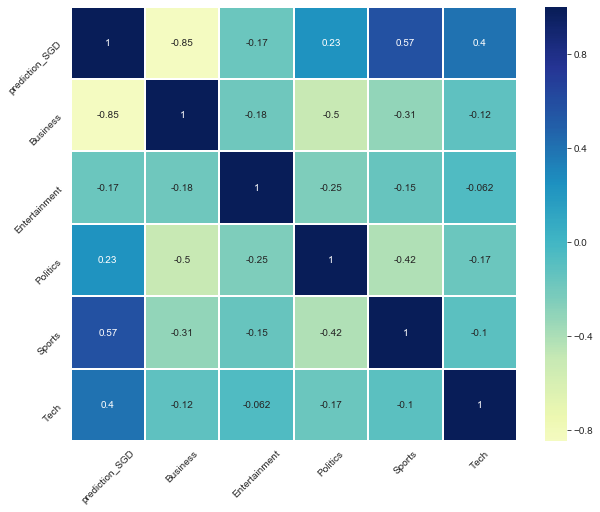

In [39]:
correlation(input('Enter the name of a journalist: '))